<a href="https://colab.research.google.com/github/muu86/ml_study/blob/main/%EC%9D%98%EC%82%AC_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%EB%B0%8F_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 트리 모델

* 의사 결정 나무 - 분류와 회귀 모두에 사용

선형 x
**노드** 질문지 TRUE / FALSE
순수 노드 - 결정 경계 안에 있는 클래스 중 한 쪽이 0개
의사 결정 트리는 기본적으로 과적합
따라서 복잡도를 제어하기 위해 사전 가지치기 (pre pruning) / 사후 가지치기(post pruning)
사이킷런은 **사전 가지치기**방법을 제공

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

가장 중요한 하이퍼 파라미터
- max_depth
- max_features 고려할 특성 수
- max_leaf_nodes 최대순수노드의 개수

In [3]:
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


## 위에서 훈련 세트의 정확도가 100프로가 나온 이유는?

모든 리프 노드가 순수 노드가 됐기 때문이다.

In [8]:
# 사전 가지치기 적용하기
tree_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_depth_4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
print('훈련 세트 정확도 : {:.3f}'.format(tree_depth_4.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree_depth_4.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


## 트리 모델은 예측으로서도 성능이 괜찮다.

근데 특성 중요도를 볼 수도 있어요 (트리 모델의 분석 메리트)

In [12]:
print('특성 중요도 : \n{}'.format(tree_depth_4.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [15]:
import pandas as pd

df = pd.DataFrame(cancer.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


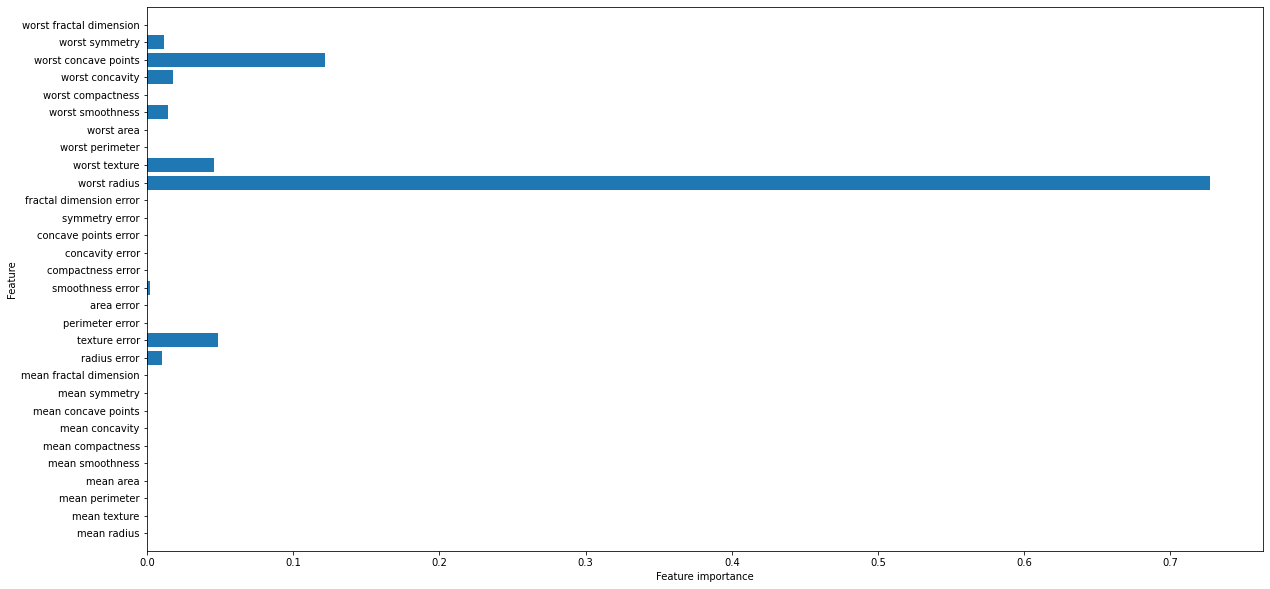

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(20, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

## 특성에 대한 선형 모델과 트리 모델의 차이점

* 선형 모델 : 가중치(weight) 를 사용
  - 음수 양수로 구분
  - 가중치가 음수면 음성 클래스 지지
  - 가중치가 양수면 양성 클래스 지지

* 트리 모델
  - 특성 중요도만 확인하기 때문에
  - 음성 클래스를 지지하는지 양성 클래스를 지지하는지 알 수가 없다.

In [20]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7a1871e8c2bc054973526e024eeeb584704d77af065ea62bedbd0658eda76b6a
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [21]:
import os
import mglearn
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [26]:
ram_prices.tail(100)

,Unnamed: 0,date,price
233,233,2003.17,0.1760
234,234,2003.25,0.0760
235,235,2003.33,0.1260
236,236,2003.42,0.1150
237,237,2003.50,0.1330
...,...,...,...
328,328,2015.58,0.0045
329,329,2015.67,0.0043
330,330,2015.75,0.0042
331,331,2015.83,0.0038


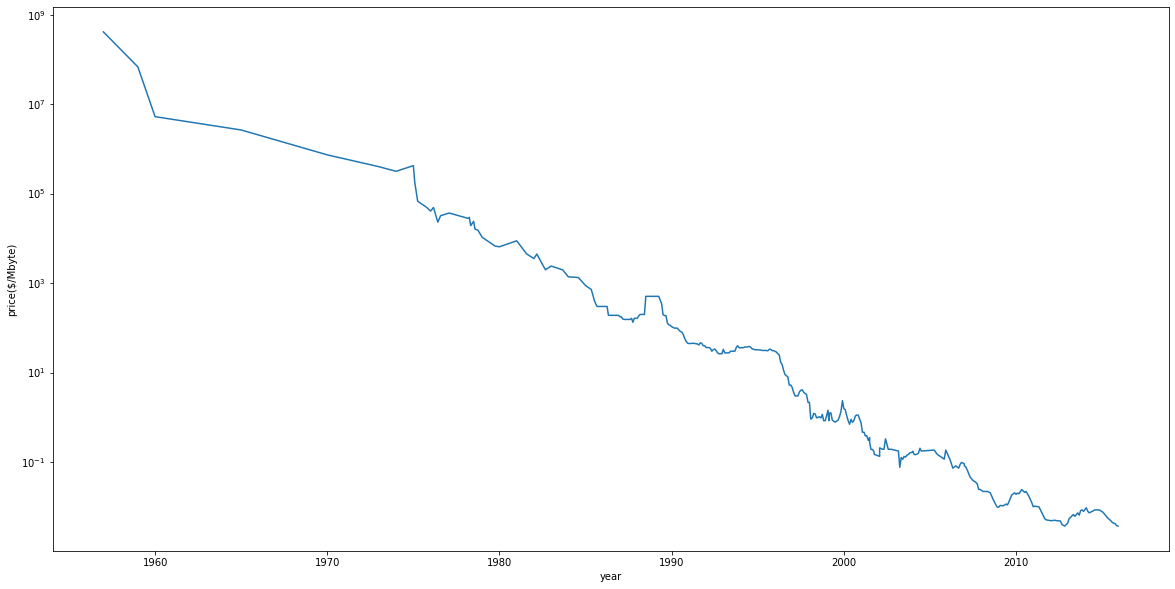

In [24]:
plt.figure(figsize=(20, 10))

# semilogy : y축 값의 스케일이 너무 크다
# y 축에 로그를 씌운다
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2009 년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 하기 위해 날짜 특성만을 이용
# 모델에 데이터를 훈련시키기 위해서는 반드시 2차원 배열이어야만 한다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 관계를 간단하게 하기 위해서 로크 스케일 적용
y_train = np.log(data_train.price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [34]:
# np.newaxis
arr = np.arange(5)
print(arr.shape, arr.ndim)

arr2 = arr[np.newaxis, : ]
print(arr2)
print(arr2.shape, arr2.ndim)

arr3 = arr[:, np.newaxis]
print(arr3)
print(arr3.shape, arr3.ndim)

(5,) 1
[[0 1 2 3 4]]
(1, 5) 2
[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1) 2


In [36]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [38]:
# 예측용 데이터 만들기 ( 전체 기간 )

# 예측용, 테스트용 데이터는 무조건 train 데이터와 shape[-1] 의 값이 똑같아야 한다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr   = lin_reg.predict(X_all)

# semilogy 시각화를 사용할 것이기 때문에 로그 스케일의 값을 원래대로 복구하기
price_tree = np.exp(pred_tree)
price_lr   = np.exp(pred_lr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


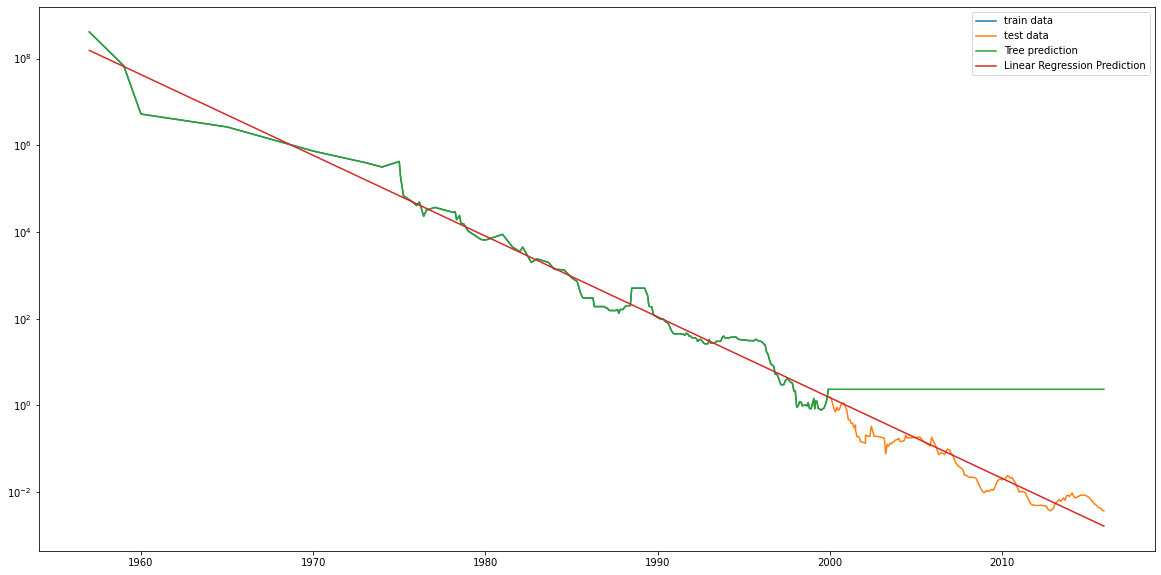

In [41]:
plt.figure(figsize=(20, 10))
plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear Regression Prediction')
plt.legend()
plt.show()

트리 모델은 시계열 데이터에 적합하지 않다.

## 앙상블 모델

* 랜덤 포레스트(Random Forest)
* 그래디언트 부스팅(Gradient Boosting)

둘 다 결정 트리 기반

## 랜덤 포레스트
* 과적합 되어있는 트리를 여러개 준비
* 과적합된 트리는 **각각 다른 방향**으로 예측한다.
* 각각  다른 방향 : 무작위 특성을 활용해서 예측
* 무작위성을 부여하는 과정 : **부트스트랩 샘플링(Bootstrap Sampling)** 이라고 한다.
* 부트스트랩 샘플링은 전체 데이터 특성(feature)에서 무작위로 의사 결정 트리를 위한 feature 로 선정하는 방식

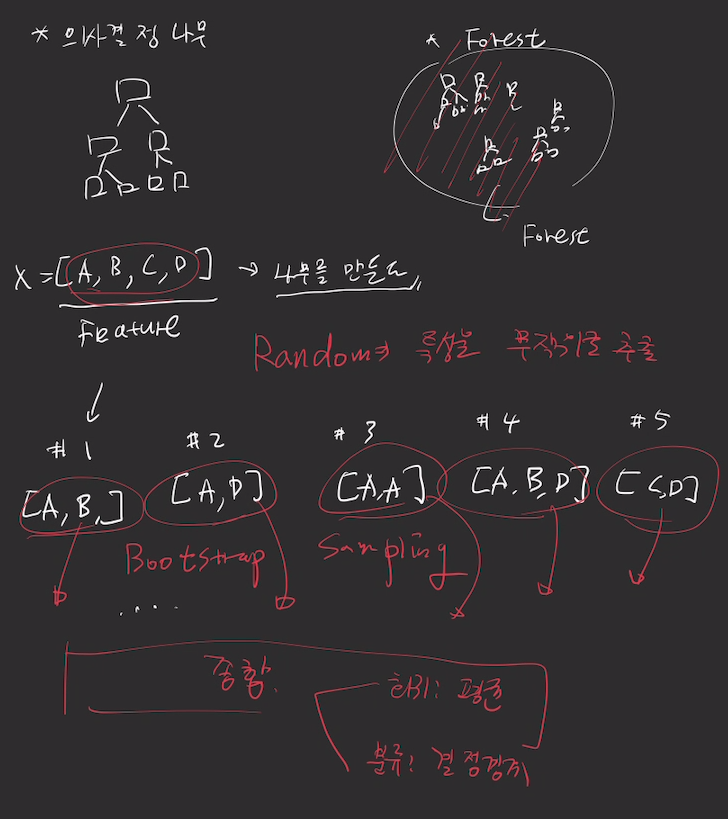